# <center> Task 1. Time Series Analysis </center>

<u>Golden Task: Choose a dataset with a time component and perform time series analysis.</u>

Dataset : https://www.kaggle.com/datasets/twinkle0705/state-wise-power-consumption-in-india

Objective : To uncover patterns, trends, and insights from the data, enabling a better understanding of power consumption over time.

---
1. Importing Libraries
2. Data cleaning
3. Time Series Analysis

---

## Importing Libraries

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [447]:
df1 = pd.read_csv(r'dataset_tk.csv')
df1.head(3)

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5


In [448]:
df1.isnull().sum()

Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [449]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [450]:
df1.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df1['Date']=pd.to_datetime(df1["Date"],dayfirst=True)
df1.head(3)

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5


In [451]:
df1.shape

(503, 34)

In [452]:
df2 = pd.read_csv(r'long_data_.csv')
df2.head(3)

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1


In [453]:
df2['Dates']=pd.to_datetime(df2['Dates'],dayfirst=True)

In [454]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   States     16599 non-null  object        
 1   Regions    16599 non-null  object        
 2   latitude   16599 non-null  float64       
 3   longitude  16599 non-null  float64       
 4   Dates      16599 non-null  datetime64[ns]
 5   Usage      16599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 778.2+ KB


In [455]:
df2.shape

(16599, 6)

In [456]:
df2.head(3)

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1


# <center> <div style = 'background-color:pink'> Time Series Analysis </center></div>

## <u>*Analysis on 1st Dataset*</u>

In [457]:
# Convert dtype
df1['Year']  =df1['Date'].dt.year
df1['Month'] =df1['Date'].dt.month
df1['Day']   =df1['Date'].dt.day

df1.drop(['Date'],axis=1,inplace=True)

In [458]:
df1.head(3)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Year,Month,Day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3
2,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019,1,4


- ### Monthly Average Cosumption of Power for all states


In [459]:
monthly_data = df1.groupby('Month').mean().drop(['Year','Day'],axis=1) 
monthly_data

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Month,,,,,,,,,,,,,,,,,,,,,
1,157.712963,150.764815,213.350000,95.275926,329.481481,36.822222,26.705556,43.412963,4.427778,87.175926,...,82.653704,145.077778,1.146296,2.161111,25.757407,2.470370,5.640741,1.707407,2.185185,4.185185
2,127.079592,134.502041,217.548980,82.214286,323.351020,36.589796,26.220408,45.389796,4.038776,81.648980,...,79.481633,141.487755,1.134694,2.065306,24.204082,2.565306,5.512245,1.718367,2.138776,4.122449
3,142.177778,133.570370,210.474074,79.248148,296.733333,33.907407,24.979630,44.100000,4.064815,78.868519,...,75.750000,130.574074,1.390741,2.044444,24.483333,2.448148,5.400000,1.661111,2.177778,4.044444
4,137.876923,138.561538,234.763462,81.157692,301.161538,37.957692,28.526923,44.484615,4.086538,85.971154,...,78.719231,132.898077,1.373077,2.180769,24.357692,2.565385,6.082692,1.759615,2.140385,3.923077
5,144.050000,138.906522,214.380435,85.560870,316.915217,34.882609,25.217391,43.558696,4.252174,85.552174,...,82.334783,138.952174,1.321739,2.067391,25.021739,2.458696,5.593478,1.678261,2.156522,4.084783
6,115.791176,127.405882,219.785294,76.714706,297.011765,36.791176,27.555882,46.173529,3.938235,79.214706,...,79.082353,132.805882,1.447059,2.167647,23.714706,2.550000,5.858824,1.776471,2.205882,3.882353
7,134.614634,130.751220,209.190244,75.351220,302.824390,33.724390,24.885366,43.665854,3.717073,82.731707,...,79.943902,133.321951,1.236585,2.048780,24.782927,2.453659,5.529268,1.717073,2.156098,3.975610
8,166.422857,153.085714,233.571429,89.551429,340.154286,37.651429,27.957143,45.391429,4.565714,82.671429,...,79.434286,135.980000,1.405714,2.140000,26.722857,2.568571,5.654286,1.691429,2.197143,4.317143
9,138.091176,136.952941,214.329412,83.897059,308.564706,36.694118,27.114706,42.750000,4.000000,93.467647,...,85.511765,156.117647,1.152941,2.158824,26.635294,2.411765,5.461765,1.711765,2.173529,4.367647


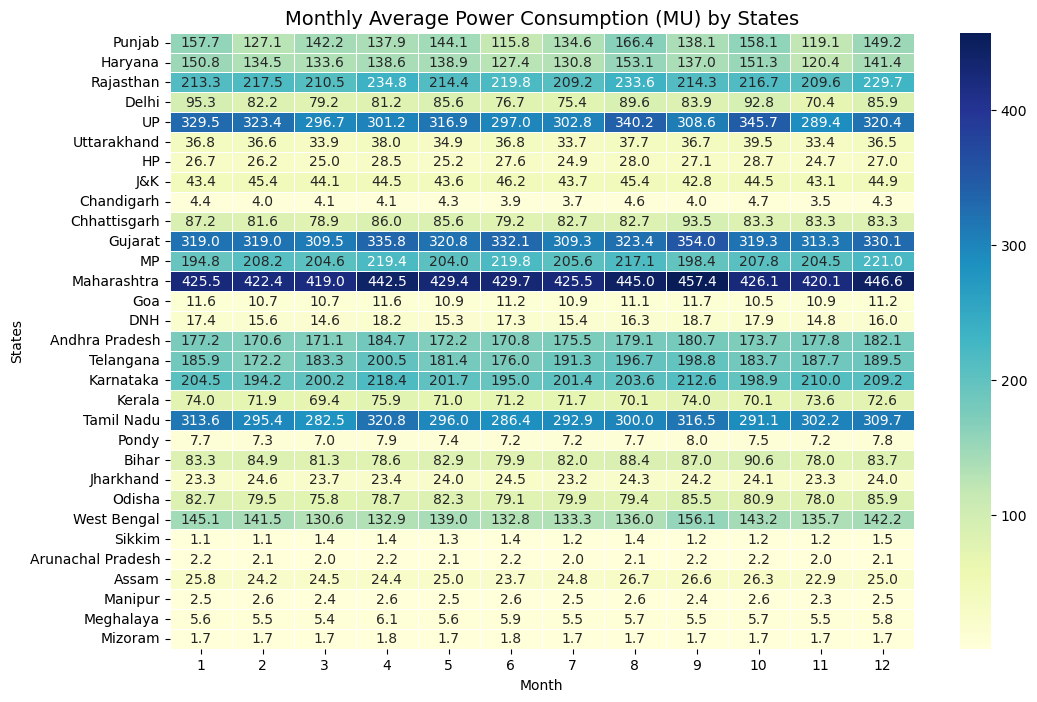

In [460]:
#cmap = plt.get_cmap('Spectral').reversed()

plt.figure(figsize=(12,8))
sns.heatmap(monthly_data[monthly_data.columns[:-2]].T, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Monthly Average Power Consumption (MU) by States', fontsize=14)
plt.xlabel('Month')
plt.ylabel('States')
plt.show()

- ### Yearly Average Cosumption of Power for all states

In [461]:
yearly_data = df1.groupby('Year').mean().drop(['Month','Day'],axis=1) 
yearly_data

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Year,,,,,,,,,,,,,,,,,,,,,
2019,138.261003,136.476323,217.656825,82.056546,313.899443,35.929248,26.436769,44.332312,4.101393,84.066574,...,80.686908,138.910028,1.299164,2.100279,25.012256,2.491922,5.621448,1.711142,2.163788,4.129526
2020,148.336806,142.963889,220.404167,86.681944,314.377778,36.725000,26.895833,44.093750,4.241667,83.404861,...,79.910417,138.204861,1.265278,2.131250,24.829861,2.501389,5.699306,1.694444,2.159028,3.975694


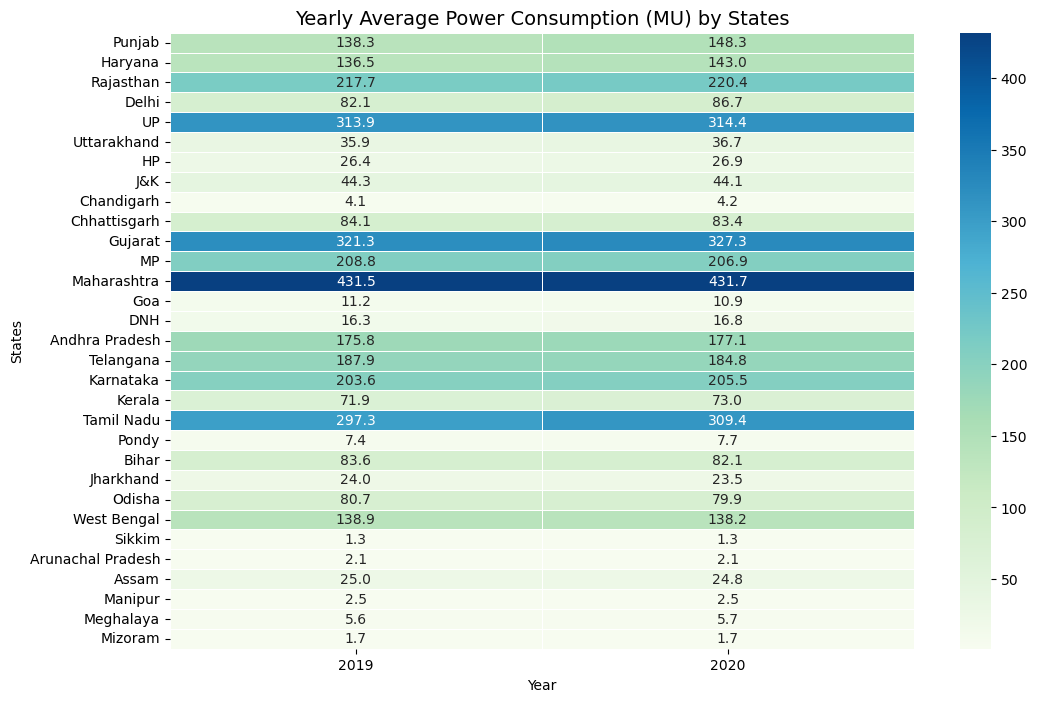

In [462]:
plt.figure(figsize=(12,8))
sns.heatmap(yearly_data[yearly_data.columns[:-2]].T, cmap='GnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Yearly Average Power Consumption (MU) by States',fontsize=14)
plt.xlabel('Year')
plt.ylabel('States')
plt.show()

In [463]:
# Yearly Consumption of all the states
total_cons = df1.groupby('Year').sum().drop(['Month','Day'],axis=1)
total_cons

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Year,,,,,,,,,,,,,,,,,,,,,
2019,49635.7,48995.0,78138.8,29458.3,112689.9,12898.6,9490.8,15915.3,1472.4,30179.9,...,28966.6,49868.7,466.4,754.0,8979.4,894.6,2018.1,614.3,776.8,1482.5
2020,21360.5,20586.8,31738.2,12482.2,45270.4,5288.4,3873.0,6349.5,610.8,12010.3,...,11507.1,19901.5,182.2,306.9,3575.5,360.2,820.7,244.0,310.9,572.5


<Figure size 1200x800 with 0 Axes>

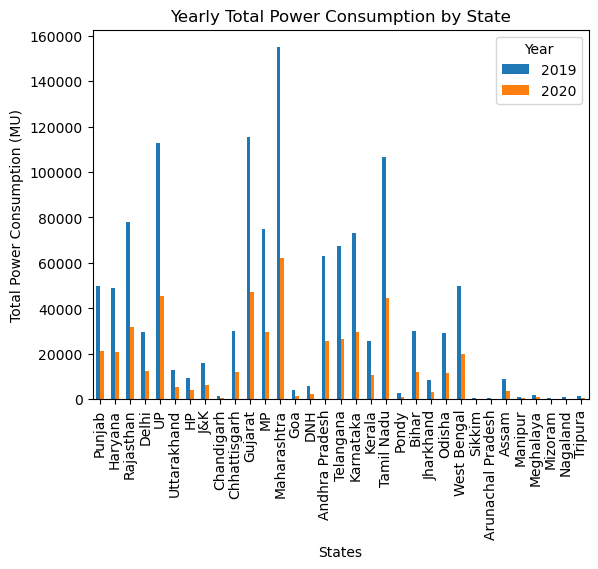

In [464]:
plt.figure(figsize=(12,8))
total_cons.T.plot(kind='bar')
plt.title('Yearly Total Power Consumption by State')
plt.xlabel('States')
plt.ylabel('Total Power Consumption (MU)')
plt.show()

- ### Daily Consumption for all States

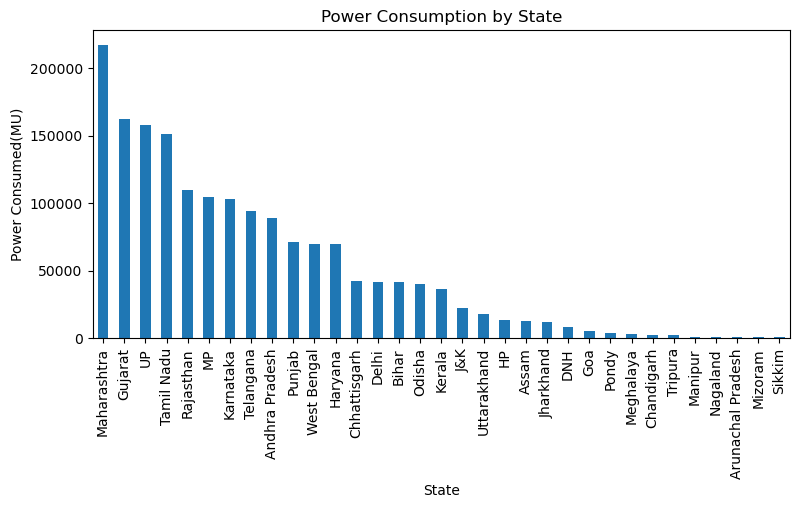

In [465]:
daily_con = df1.groupby('Day').sum().drop(['Year','Month'],axis=1)
sorted_daily_cons = daily_con.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(9,4))
sorted_daily_cons.plot(kind='bar')
plt.title('Power Consumption by State')
plt.xlabel('State')
plt.ylabel('Power Consumed(MU)')
plt.show()

On analyzing Yearly, monthly and daily consumption of power, following conclusions can be drawn:
1. Top 5 states consuming maximum power are : Maharashtra, Gujarat, UP, Tamil Nadu and Rajashtan. 
2. Top 5 states consuming minimum power are : Manipur, Nagaland, Arunanchal Pradesh, Mizoram and Sikkim.

## <u>*Analysis on 2nd Dataset*</u>

In [466]:
df2.head(4)

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8


In [467]:
df2['Year']  = df2['Dates'].dt.year
df2['Month'] = df2['Dates'].dt.month
df2['Day']   = df2['Dates'].dt.day

df2.drop(['Dates'],axis=1,inplace=True)

In [468]:
df2.head(4)

,States,Regions,latitude,longitude,Usage,Year,Month,Day
0,Punjab,NR,31.519974,75.980003,119.9,2019,1,2
1,Haryana,NR,28.450006,77.019991,130.3,2019,1,2
2,Rajasthan,NR,26.449999,74.639981,234.1,2019,1,2
3,Delhi,NR,28.669993,77.230004,85.8,2019,1,2


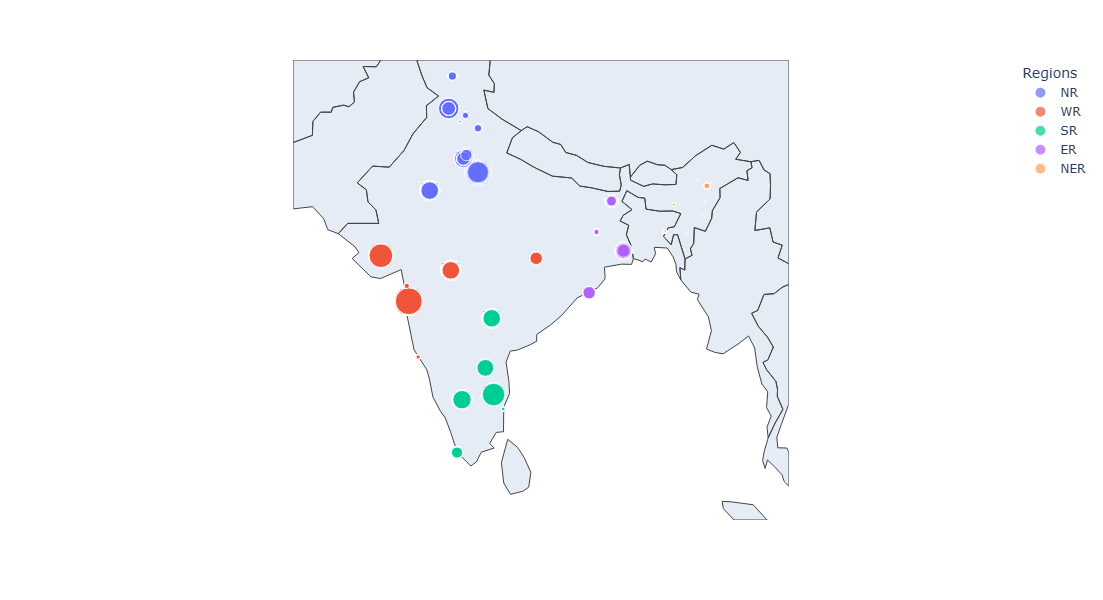

In [469]:
# Analysis over India
# Using plotly library
fig = px.scatter_geo(df2, 'latitude', 'longitude', color = 'Regions', hover_name ='States', size = 'Usage', scope = 'asia')
fig.update_layout(height=600, width=800)
# Indian Region
fig.update_geos(lataxis_range = [5,35], lonaxis_range = [65,100])
fig.show()

- ### Yearly Regional Power Consumption

The amount of power consumed by a region on yearly basis.

In [470]:
data = df2.drop(['latitude','longitude'], axis=1)
data

,States,Regions,Usage,Year,Month,Day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2
...,...,...,...,...,...,...
16594,Manipur,NER,2.5,2020,12,5
16595,Meghalaya,NER,5.8,2020,12,5
16596,Mizoram,NER,1.6,2020,12,5
16597,Nagaland,NER,2.1,2020,12,5


In [471]:
years = [2019, 2020]
usages = []
for year in years:
    usage_data = data[data['Year'] == year].groupby('Regions')['Usage'].sum()
    usage_dict = usage_data.to_dict()
    print(f"Usage in {year}: {usage_dict}")
    usages.append(usage_dict)

Usage in 2019: {'ER': 117915.1, 'NER': 15519.7, 'NR': 358694.8, 'SR': 338795.2, 'WR': 385280.5}
Usage in 2020: {'ER': 46799.4, 'NER': 6190.7, 'NR': 147559.8, 'SR': 137883.4, 'WR': 155089.3}


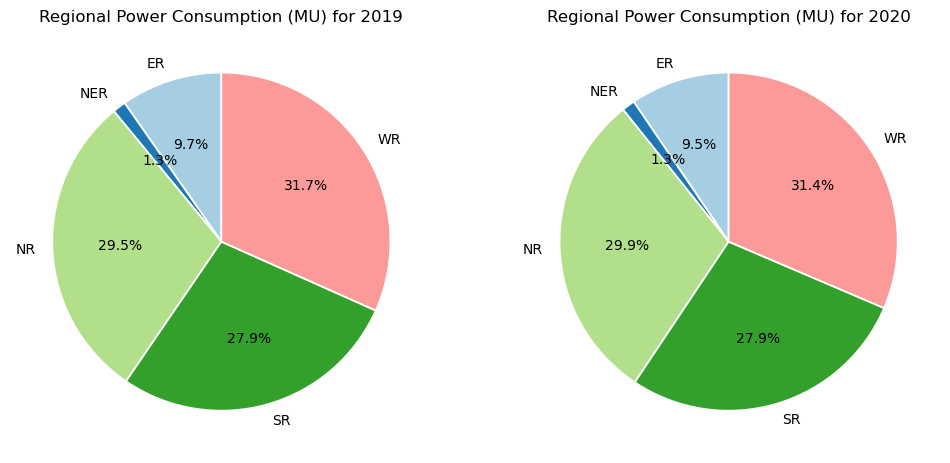

In [472]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

for i, year in enumerate(years):
    ax = axes[i]
    ax.pie(usages[i].values(), labels=usages[i].keys(), autopct='%1.1f%%', startangle=90,
           wedgeprops={'edgecolor': 'white', 'linewidth': 1.3, 'antialiased': True},
           colors=sns.color_palette('Paired'))
    ax.set_title(f'Regional Power Consumption (MU) for {year}')

plt.show()

For both year 2019 and 2020 maximum power was consumed by WR, following NR and SR. For NER the power consumption remained same for both the years.

- ### Fluctuations in Consumption

####    *1.* *Yearly Consumption*

Analyze the degree to which consumption has increased throughout the years 2019 and 2020.

In [473]:
# Dataframe for rise or fall in consumption
#test_df = data.groupby(['States','Year']).sum().drop(['Regions','Month','Day'],axis=1).unstack()
rise_fall_data = data.groupby(['States','Year'])['Usage'].sum().unstack()

# Calculate the difference between consumption in 2020 and 2019 for each state
rise_fall_data['Diff_Consumption'] =  rise_fall_data[2019] - rise_fall_data[2020]
rise_fall_data

Year,2019,2020,Diff_Consumption
States,,,
Andhra Pradesh,63097.0,25507.4,37589.6
Arunachal Pradesh,754.0,306.9,447.1
Assam,8979.4,3575.5,5403.9
Bihar,30007.9,11821.3,18186.6
Chandigarh,1472.4,610.8,861.6
Chhattisgarh,30179.9,12010.3,18169.6
DNH,5845.4,2419.2,3426.2
Delhi,29458.3,12482.2,16976.1
Goa,4006.5,1573.4,2433.1


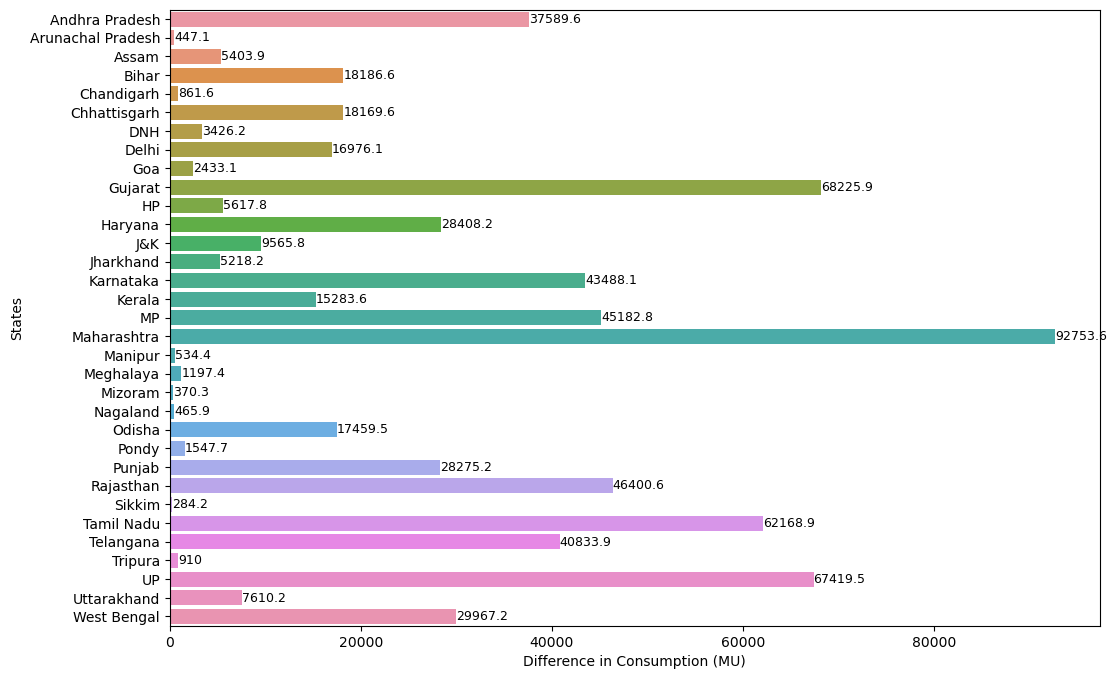

In [474]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=rise_fall_data['Diff_Consumption'], y=rise_fall_data.index)
ax.bar_label(ax.containers[0], fontsize=9)
plt.xlabel('Difference in Consumption (MU)')
plt.show()

From 2019 to 2020, the total amount of power consumed by all states is reduced.

 #### *2.* *Monthly Consumption*

Maximum variation in consumption is in the month of 7.0 in 2019
Minimum variation in consumption is in the month of 2.0 in 2019


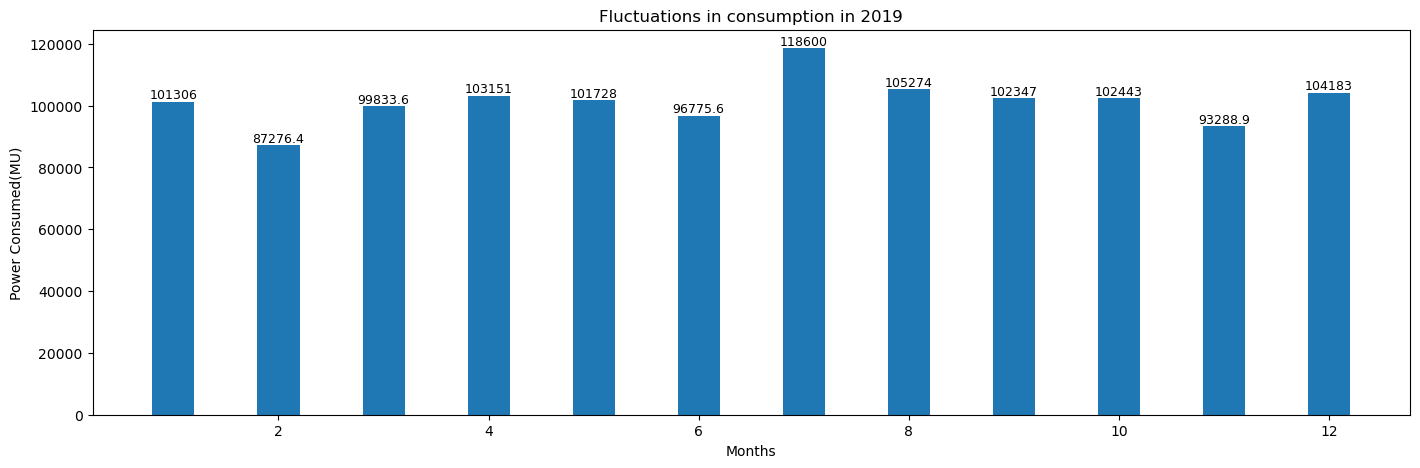

Maximum variation in consumption is in the month of 1.0 in 2020
Minimum variation in consumption is in the month of 6.0 in 2020


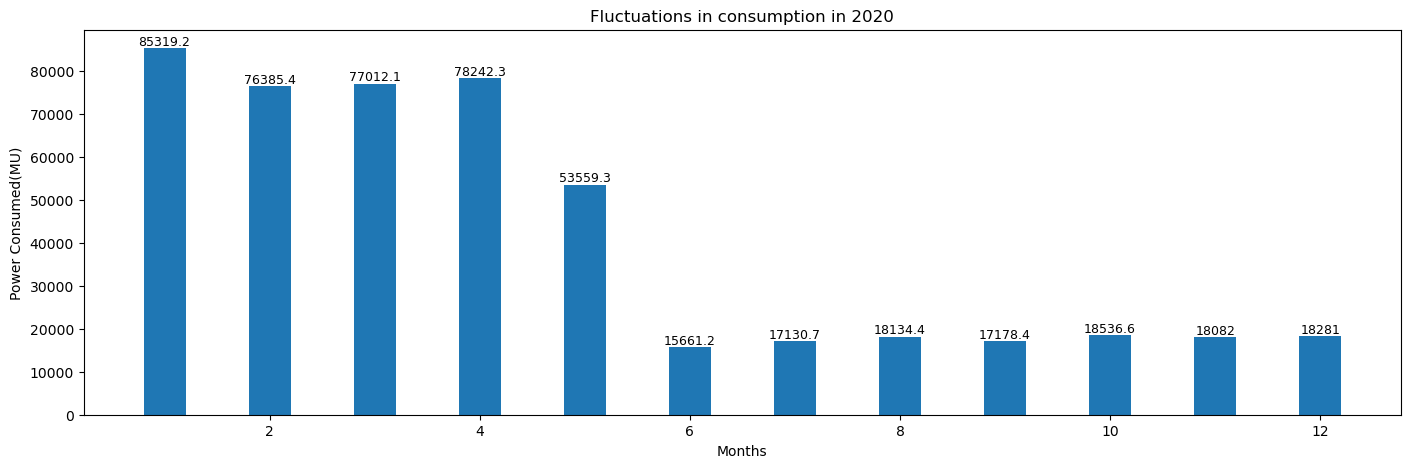

In [479]:
years = [2019, 2020]

for year in years:
    # Dataframe for current year
    df_year = data[data['Year'] == year].groupby('Month')['Usage'].sum().reset_index()

    # Month with maximum change in consumption
    max_var = df_year.loc[df_year['Usage'].idxmax()]
    max_var_month = max_var['Month']

    # Month with minimum change in consumption
    min_var = df_year.loc[df_year['Usage'].idxmin()]
    min_var_month = min_var['Month']
    
    print(f"Maximum variation in consumption is in the month of {max_var_month} in {year}")
    print(f"Minimum variation in consumption is in the month of {min_var_month} in {year}")
    
    # Plotting for maximum and minimum rise in consumption in a loop
    fig, ax = plt.subplots(figsize=(17,5))
    ax.bar(df_year['Month'], df_year['Usage'], width=0.4)
    ax.set_ylabel('Power Consumed(MU)')
    ax.bar_label(ax.containers[0], fontsize=9)
    ax.set_xlabel('Months')
    ax.set_title(f"Fluctuations in consumption in {year}")
    plt.show()

An increase in power usage was noted in July 2019 and January 2020, whereas a decrease was noticed in February 2019 and June 2020.

- ### Analysis during COVID-19

Analyze the fluctuations in power consumption before and after COVID-19 pandemic. The first wave of covid started from March 2020 and lasted till November 2020. So the analysis this period is considered.

In [476]:
before_covid = data[(data['Year'] == 2019) & (data['Month'].between(3,11))]['Usage'].sum()
after_covid  = data[(data['Year'] == 2020) & (data['Month'].between(3,11))]['Usage'].sum()
print('Difference between consumption before and after COVID is:',after_covid - before_covid)

Difference between consumption before and after COVID is: -609903.4


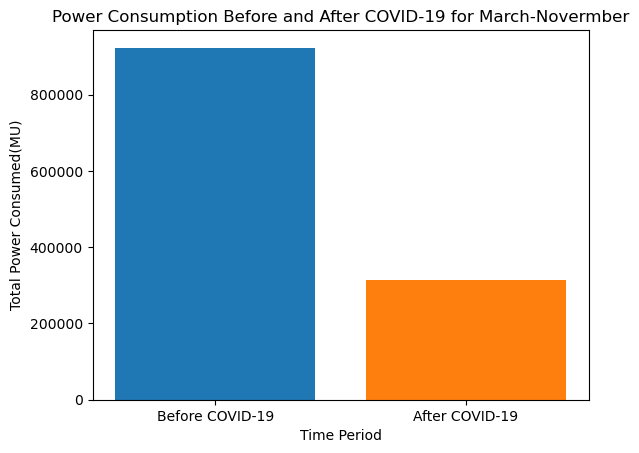

In [477]:
values = ['Before COVID-19', 'After COVID-19']
usage_values = [before_covid, after_covid]

plt.bar(values, usage_values, color=['#1f77b4', '#ff7f0e'])
plt.title('Power Consumption Before and After COVID-19 for March-Novermber')
plt.xlabel('Time Period')
plt.ylabel('Total Power Consumed(MU)')
plt.show()

In [478]:
percent_change=((before_covid-after_covid)/before_covid)*100

print(f"Change in consumption before and after covid-19 first wave is {percent_change} %")

Change in consumption before and after covid-19 first wave is 66.04686128092295 %
